In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression


In [2]:
df= pd.read_csv('../../Datasets/Boston.csv')



In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN


In [4]:
df.drop(columns=['Unnamed: 15' , 'Unnamed: 16'],  axis=0 , inplace=True)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [6]:
df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [7]:
df.shape

(506, 15)

In [8]:
df.drop(columns=['CAT. MEDV'] , inplace=True)

In [9]:
df.shape

(506, 14)

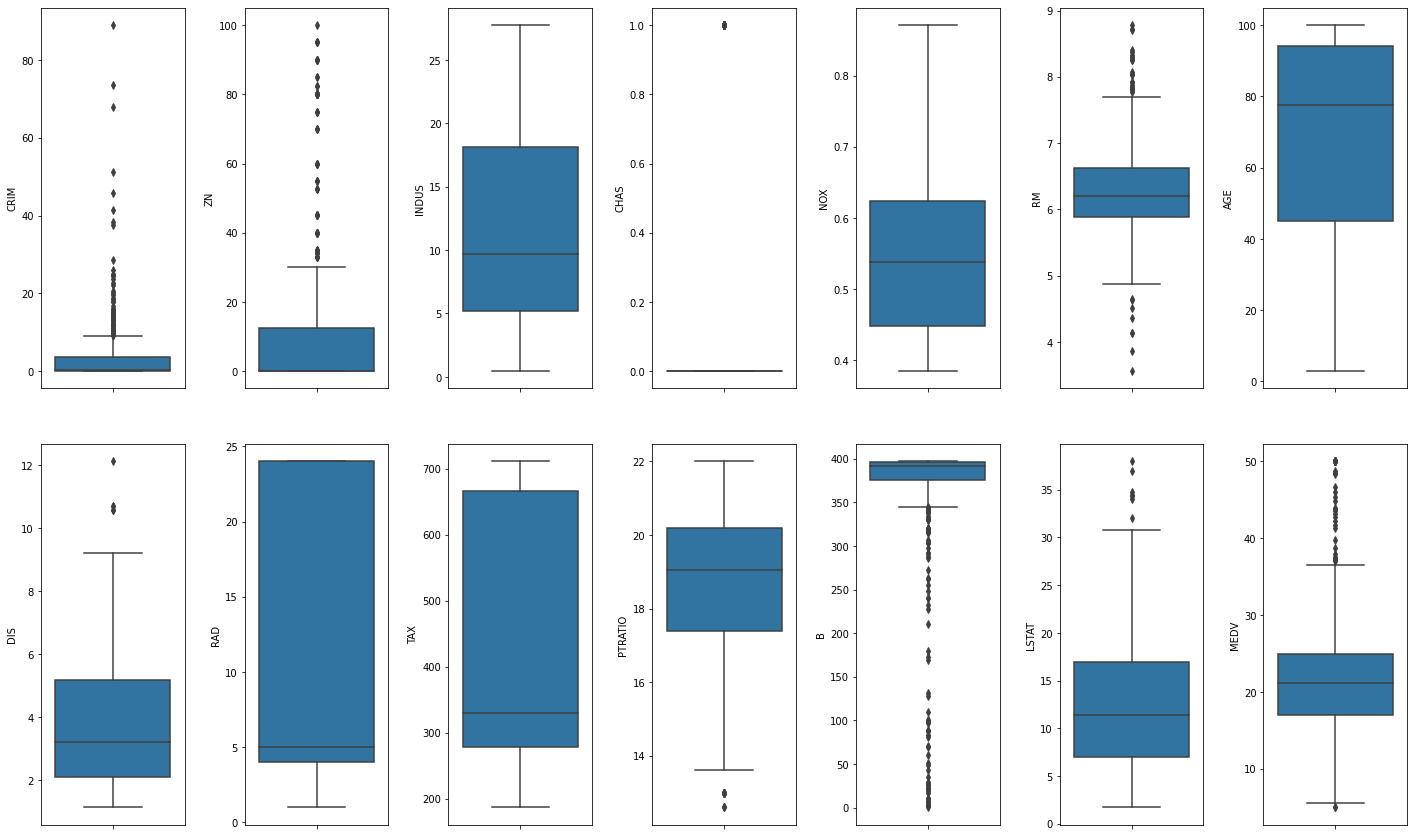

In [10]:
fig , ax = plt.subplots(2,7 , figsize =(20,12))
sns.boxplot(data = df , y = 'CRIM' , ax = ax[0,0] )
sns.boxplot(data = df , y = 'ZN' , ax = ax[0,1] )
sns.boxplot(data = df , y = 'INDUS' , ax = ax[0,2] )
sns.boxplot(data = df , y = 'CHAS' ,  ax = ax[0,3] )
sns.boxplot(data = df , y = 'NOX' ,  ax = ax[0,4] )
sns.boxplot(data = df , y = 'RM' ,  ax = ax[0,5] )
sns.boxplot(data = df , y = 'AGE' ,  ax = ax[0,6] )
sns.boxplot(data = df , y = 'DIS' ,  ax = ax[1,0] )
sns.boxplot(data = df , y = 'RAD' ,  ax = ax[1,1] )
sns.boxplot(data = df , y = 'TAX' ,  ax = ax[1,2] )
sns.boxplot(data = df , y = 'PTRATIO' ,  ax = ax[1,3] )
sns.boxplot(data = df , y = 'B' ,  ax = ax[1,4] )
sns.boxplot(data = df , y = 'LSTAT' ,  ax = ax[1,5] )
sns.boxplot(data = df , y = 'MEDV' ,  ax = ax[1,6] )


plt.tight_layout(pad=2 , w_pad = 2 , h_pad = 5 )


In [11]:
type(fig)

matplotlib.figure.Figure

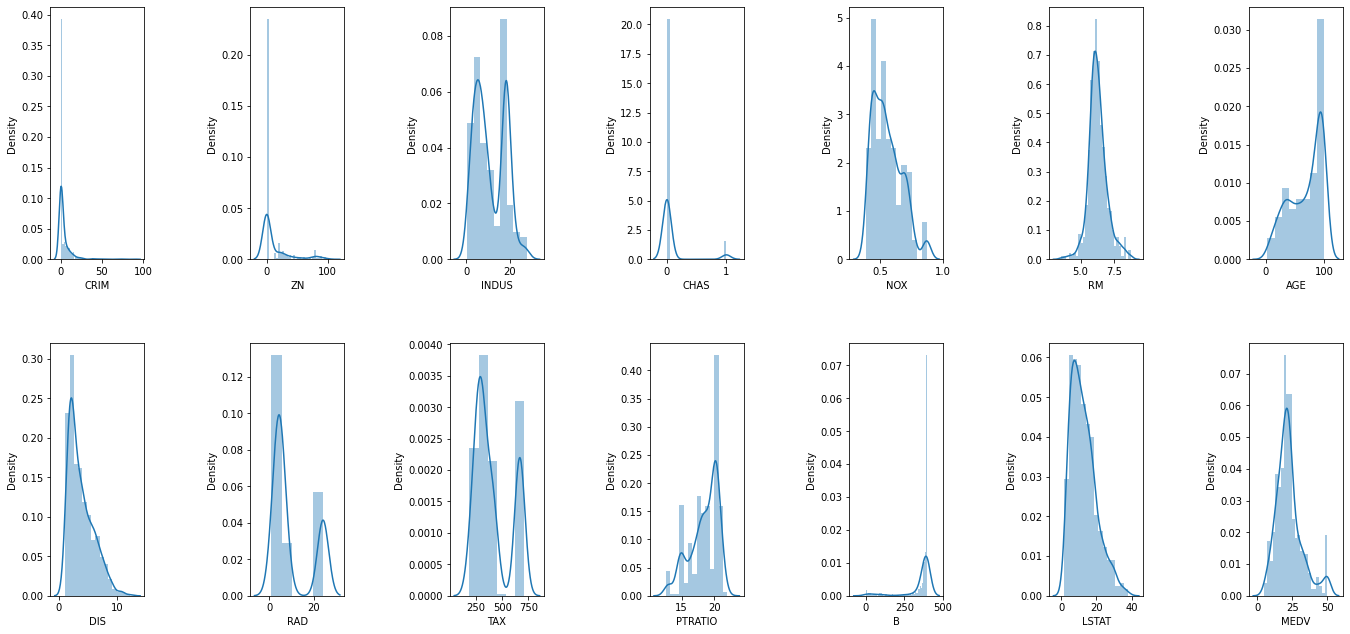

In [12]:
fig , ax = plt.subplots(ncols = 7  , nrows = 2 , figsize =(20,10))
sns.distplot(df["CRIM"] , ax = ax[0,0])
sns.distplot(df["ZN"] , ax = ax[0,1])
sns.distplot(df["INDUS"] , ax = ax[0,2])
sns.distplot(df["CHAS"] , ax = ax[0,3])
sns.distplot(df["NOX"] , ax = ax[0,4])
sns.distplot(df["RM"] , ax = ax[0,5])
sns.distplot(df["AGE"] , ax = ax[0,6])
sns.distplot(df["DIS"] , ax = ax[1,0])
sns.distplot(df["RAD"] , ax = ax[1,1])
sns.distplot(df["TAX"] , ax = ax[1,2])
sns.distplot(df["PTRATIO"] , ax = ax[1,3])
sns.distplot(df["B"] , ax = ax[1,4])
sns.distplot(df["LSTAT"] , ax = ax[1,5])
sns.distplot(df["MEDV"] , ax = ax[1,6])

plt.tight_layout(pad=5 , w_pad = 5 , h_pad = 5 )

In [13]:
cols = ["B" , "CRIM" , "TAX" , "ZN"]
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum)/(maximum - minimum)


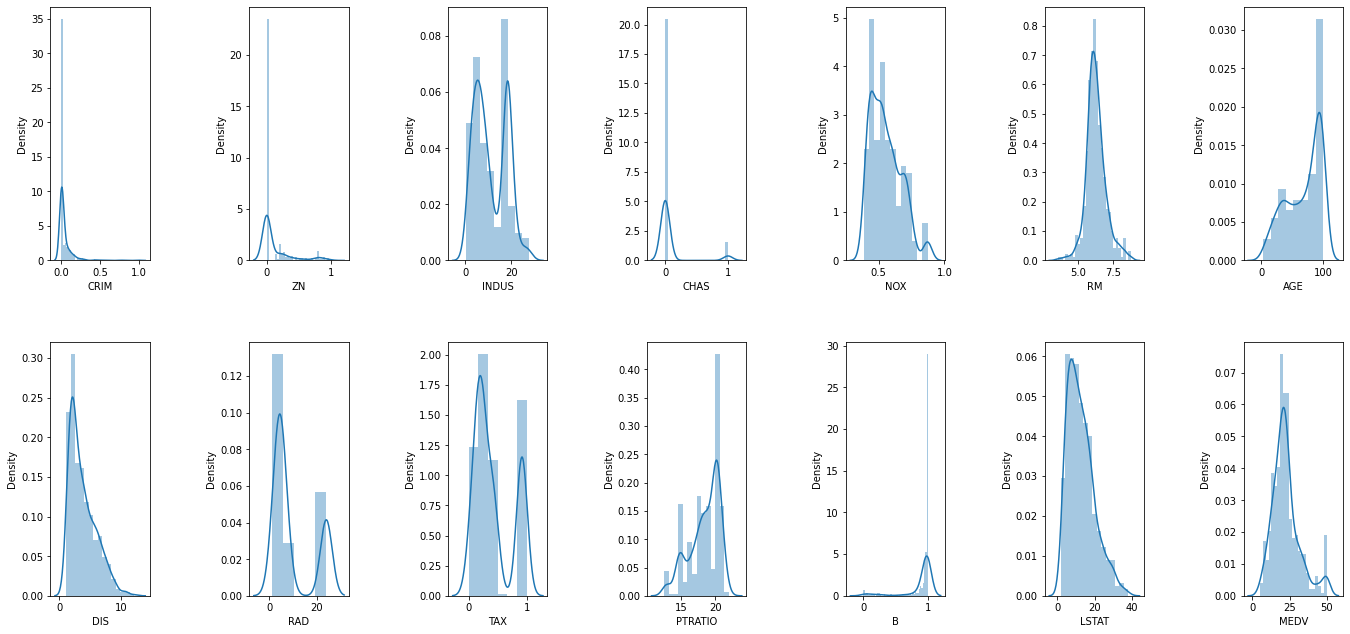

In [14]:
fig , ax = plt.subplots(ncols = 7  , nrows = 2 , figsize =(20,10))
sns.distplot(df["CRIM"] , ax = ax[0,0])
sns.distplot(df["ZN"] , ax = ax[0,1])
sns.distplot(df["INDUS"] , ax = ax[0,2])
sns.distplot(df["CHAS"] , ax = ax[0,3])
sns.distplot(df["NOX"] , ax = ax[0,4])
sns.distplot(df["RM"] , ax = ax[0,5])
sns.distplot(df["AGE"] , ax = ax[0,6])
sns.distplot(df["DIS"] , ax = ax[1,0])
sns.distplot(df["RAD"] , ax = ax[1,1])
sns.distplot(df["TAX"] , ax = ax[1,2])
sns.distplot(df["PTRATIO"] , ax = ax[1,3])
sns.distplot(df["B"] , ax = ax[1,4])
sns.distplot(df["LSTAT"] , ax = ax[1,5])
sns.distplot(df["MEDV"] , ax = ax[1,6])

plt.tight_layout(pad=5 , w_pad = 5 , h_pad = 5 )

In [15]:
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols , columns=cols)

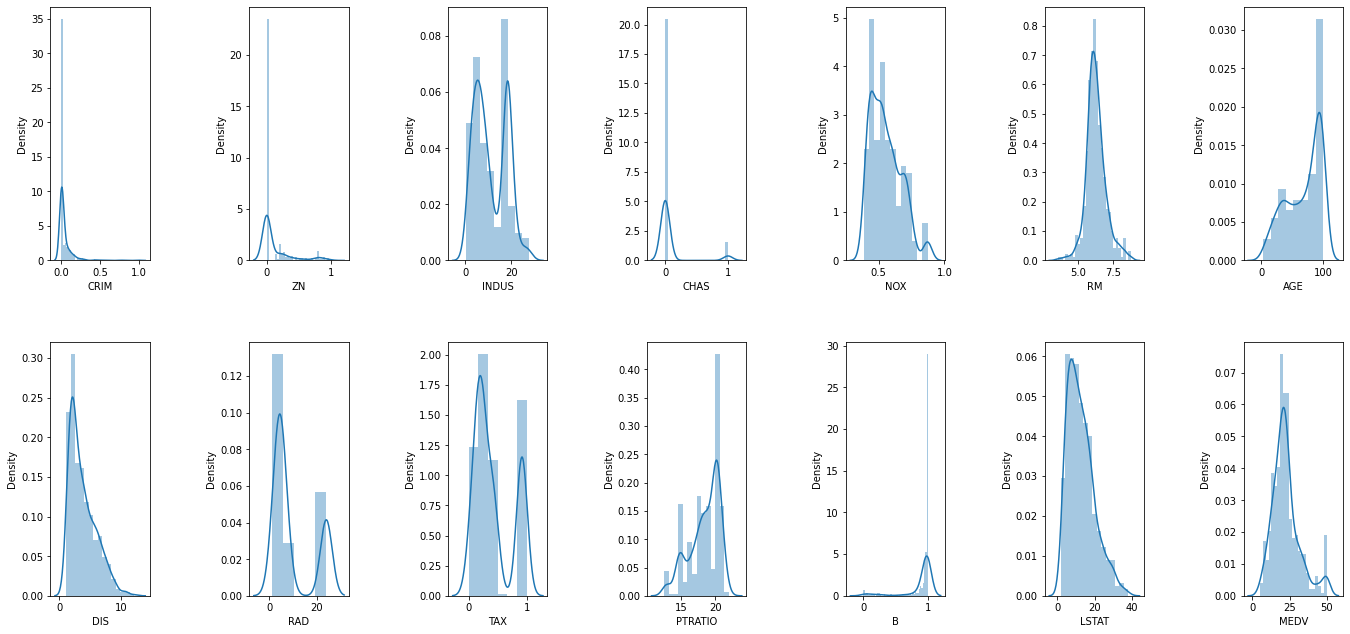

In [16]:
fig , ax = plt.subplots(ncols = 7  , nrows = 2 , figsize =(20,10))
sns.distplot(df["CRIM"] , ax = ax[0,0])
sns.distplot(df["ZN"] , ax = ax[0,1])
sns.distplot(df["INDUS"] , ax = ax[0,2])
sns.distplot(df["CHAS"] , ax = ax[0,3])
sns.distplot(df["NOX"] , ax = ax[0,4])
sns.distplot(df["RM"] , ax = ax[0,5])
sns.distplot(df["AGE"] , ax = ax[0,6])
sns.distplot(df["DIS"] , ax = ax[1,0])
sns.distplot(df["RAD"] , ax = ax[1,1])
sns.distplot(df["TAX"] , ax = ax[1,2])
sns.distplot(df["PTRATIO"] , ax = ax[1,3])
sns.distplot(df["B"] , ax = ax[1,4])
sns.distplot(df["LSTAT"] , ax = ax[1,5])
sns.distplot(df["MEDV"] , ax = ax[1,6])

plt.tight_layout(pad=5 , w_pad = 5 , h_pad = 5 )

In [17]:
for col in cols:
    df[col] = scaled_cols[col]

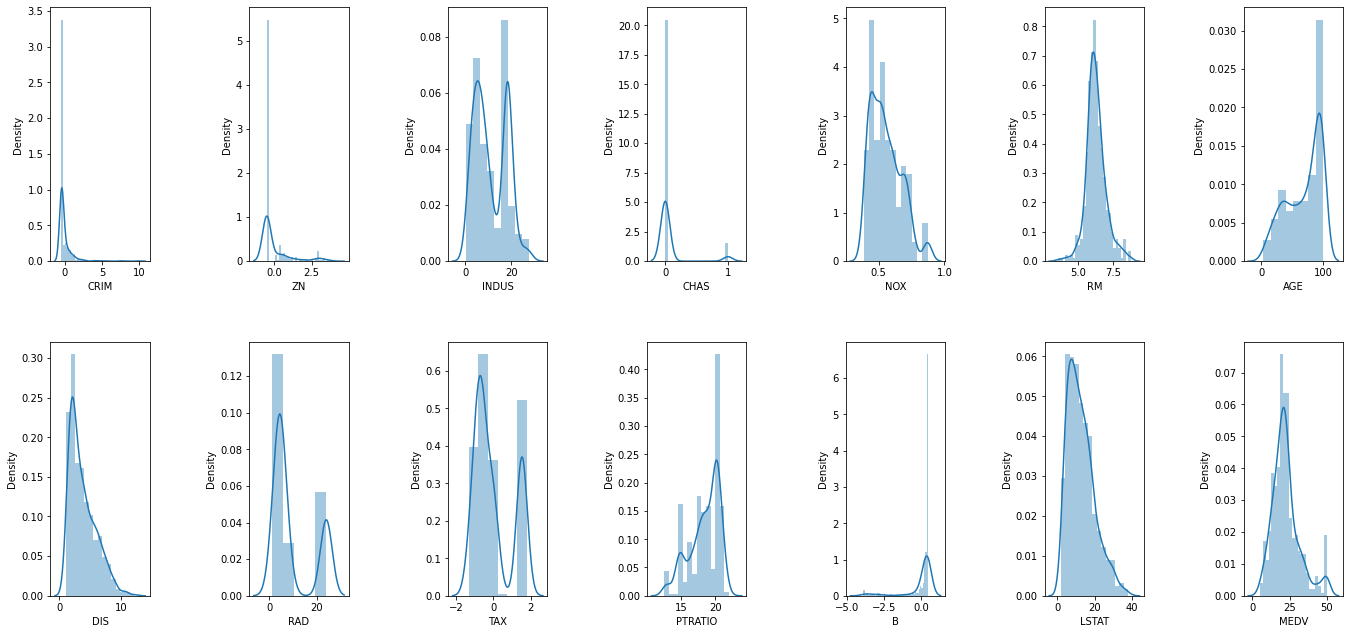

In [18]:
fig , ax = plt.subplots(ncols = 7  , nrows = 2 , figsize =(20,10))
sns.distplot(df["CRIM"] , ax = ax[0,0])
sns.distplot(df["ZN"] , ax = ax[0,1])
sns.distplot(df["INDUS"] , ax = ax[0,2])
sns.distplot(df["CHAS"] , ax = ax[0,3])
sns.distplot(df["NOX"] , ax = ax[0,4])
sns.distplot(df["RM"] , ax = ax[0,5])
sns.distplot(df["AGE"] , ax = ax[0,6])
sns.distplot(df["DIS"] , ax = ax[1,0])
sns.distplot(df["RAD"] , ax = ax[1,1])
sns.distplot(df["TAX"] , ax = ax[1,2])
sns.distplot(df["PTRATIO"] , ax = ax[1,3])
sns.distplot(df["B"] , ax = ax[1,4])
sns.distplot(df["LSTAT"] , ax = ax[1,5])
sns.distplot(df["MEDV"] , ax = ax[1,6])

plt.tight_layout(pad=5 , w_pad = 5 , h_pad = 5 )

<AxesSubplot:>

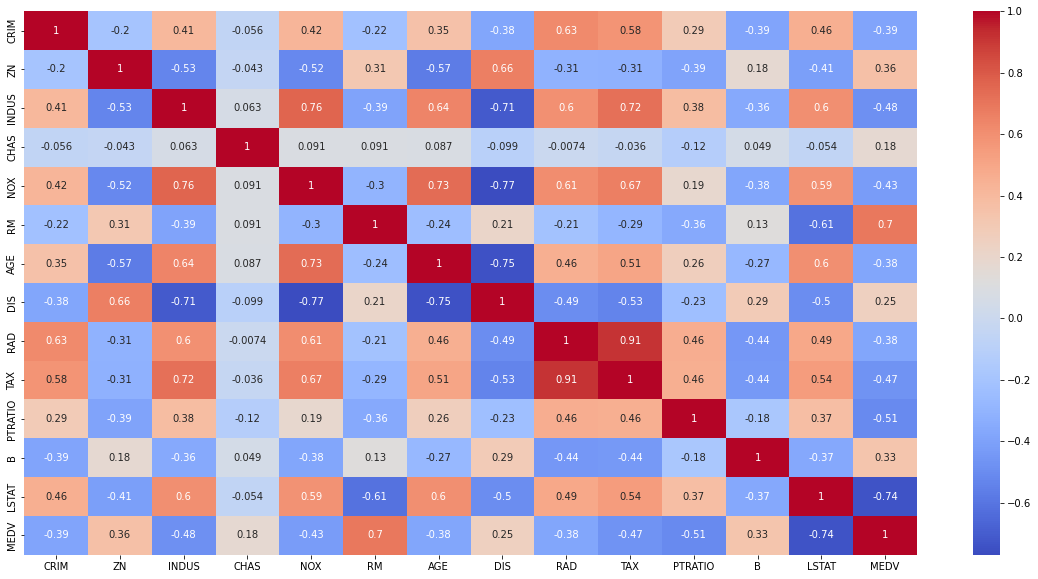

In [19]:
plt.figure(figsize=(20,10 ))
sns.heatmap(df.corr() , annot=True , cmap="coolwarm" )


In [20]:
X = df.drop(columns=['MEDV' , 'RAD'] , axis=1)
Y = df['MEDV']

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def train(model , X , Y):
    X_train , X_test  , y_train , y_test = train_test_split(X,Y , random_state=42)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    cv_score = cross_val_score(model , X , Y , scoring='neg_mean_squared_error' , cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:" , mean_squared_error(y_test, pred))
    print("CV:" , cv_score)

Model Report
MSE: 23.87100506736489
CV: 35.58136621076919


<AxesSubplot:title={'center':'importance'}>

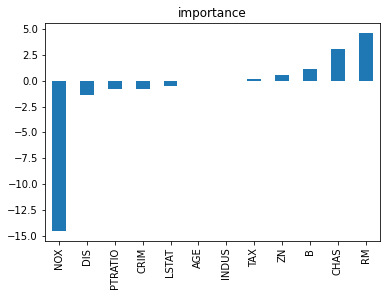

In [26]:
model1 = LinearRegression(normalize=True)
train(model1 , X , Y)
coef = pd.Series(model1.coef_ , X.columns).sort_values()
coef.plot(kind = "bar" , title = "importance")

Model Report
MSE: 10.94661417322835
CV: 42.16625276645311


<AxesSubplot:title={'center':'importance'}>

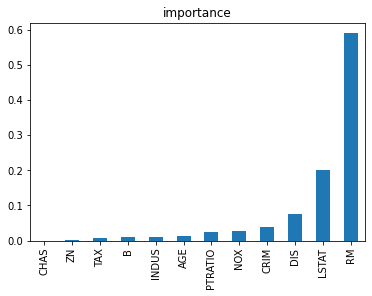

In [28]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(random_state=42)
train(model2 , X , Y)
coef = pd.Series(model2.feature_importances_, X.columns).sort_values()
coef.plot(kind = "bar" , title = "importance")

Model Report
MSE: 10.16193211023622
CV: 21.148831116443397


<AxesSubplot:title={'center':'importance'}>

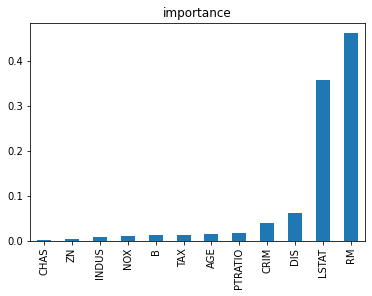

In [35]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(random_state=42)

train(model3 , X , Y)
coef = pd.Series(model3.feature_importances_, X.columns).sort_values()
coef.plot(kind = "bar" , title = "importance")



Model Report
MSE: 10.229776363874551
CV: 18.766198044819188


<AxesSubplot:title={'center':'importance'}>

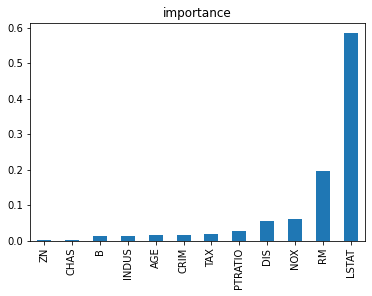

In [36]:
import xgboost as xgb
model4 = xgb.XGBRegressor()
train(model4 , X , Y)
coef = pd.Series(model4.feature_importances_, X.columns).sort_values()
coef.plot(kind = "bar" , title = "importance")
